In [2]:
import openai
from dotenv import load_dotenv
import os

## Test OpenAI

In [5]:
load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

In [8]:
import openai
from openai import OpenAI

# Инициализация клиента
client = OpenAI(api_key=OPENAI_API_KEY)

# Запрос к модели GPT-3.5 или GPT-4
response = client.chat.completions.create(
    model="gpt-3.5-turbo",  # или "gpt-4"
    messages=[
        {"role": "system", "content": "Ты полезный ассистент."},
        {"role": "user", "content": "Объясни, как работает градиентный спуск."}
    ],
    temperature=0.7,
    max_tokens=300
)

# Вывод ответа
print(response.choices[0].message.content)


Градиентный спуск - это оптимизационный алгоритм, который используется для поиска минимума (или максимума) функции. Основная идея заключается в том, что мы идем в направлении, противоположном градиенту функции, чтобы минимизировать (или максимизировать) ее значение.

Процесс работы градиентного спуска выглядит следующим образом:
1. Выбирается начальная точка.
2. Вычисляется градиент функции в этой точке, который указывает направление наискорейшего возрастания функции.
3. Делается шаг в направлении, противоположном градиенту, с определенным размером шага (так называемым learning rate).
4. Повторяются шаги 2 и 3 до тех пор, пока не будет достигнута точка минимума (или максимума) функции или пока не будет достигнуто определенное количество


## Test LangChain

In [32]:
from langchain.agents import create_sql_agent
from langchain.agents.agent_toolkits import SQLDatabaseToolkit
from langchain.sql_database import SQLDatabase
from langchain.memory import ConversationBufferMemory
from langchain.agents.agent_types import AgentType
from langchain_openai import ChatOpenAI  # обновлённый импорт

In [33]:
db = SQLDatabase.from_uri("sqlite:///../data/datalaptops.db")


In [25]:
# Настройка LLM (можно заменить модель при необходимости)
llm = ChatOpenAI(temperature=0, model_name="gpt-3.5-turbo")

In [26]:
# Инструменты SQL
toolkit = SQLDatabaseToolkit(db=db, llm=llm)

# Память агента для поддержания диалога (обновлённый способ)
memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

In [27]:
# Создание SQL-агента
agent_executor = create_sql_agent(
    llm=llm,
    toolkit=toolkit,
    verbose=True,
    agent_type=AgentType.OPENAI_FUNCTIONS,
    memory=memory
)

In [29]:
resp = agent_executor.run("Мне нужен самый популярный ноутбук")



> Entering new SQL Agent Executor chain...

Invoking: `sql_db_list_tables` with `{}`


laptops
Invoking: `sql_db_schema` with `{'table_names': 'laptops'}`



CREATE TABLE laptops (
	"Laptop" TEXT, 
	"Status" TEXT, 
	"Brand" TEXT, 
	"Model" TEXT, 
	"CPU" TEXT, 
	"RAM" INTEGER, 
	"Storage" INTEGER, 
	"Storage type" TEXT, 
	"GPU" TEXT, 
	"Screen" REAL, 
	"Touch" TEXT, 
	"Final Price" REAL
)

/*
3 rows from laptops table:
Laptop	Status	Brand	Model	CPU	RAM	Storage	Storage type	GPU	Screen	Touch	Final Price
ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core i5-1235U/8GB/512GB SSD/15.6"	New	Asus	ExpertBook	Intel Core i5	8	512	SSD	None	15.6	No	1009.0
Alurin Go Start Intel Celeron N4020/8GB/256GB SSD/15.6"	New	Alurin	Go	Intel Celeron	8	256	SSD	None	15.6	No	299.0
ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core i3-1215U/8GB/256GB SSD/15.6"	New	Asus	ExpertBook	Intel Core i3	8	256	SSD	None	15.6	No	789.0
*/
Invoking: `sql_db_query` with `{'query': 'SELECT * FROM laptops ORDER BY "Final Price" DESC LIMIT

## OpenAI Agent

In [1]:
import openai
import json

In [2]:
# Заглушка для поиска ноутбуков. Замените на свою реализацию, например, вызов SQL-запроса.
def search_db_impl(query: str) -> list:
    # Пример: если в запросе есть "600", вернуть пару ноутбуков с ценой около 600$
    if "600" in query:
        return [
            "Ноутбук A – Intel i5, 8GB RAM, 256GB SSD – $599",
            "Ноутбук B – Ryzen 5, 16GB RAM, 512GB SSD – $599"
        ]
    else:
        return [
            "Ноутбук X – Intel i7, 16GB RAM, 1TB SSD – $999",
            "Ноутбук Y – Ryzen 7, 32GB RAM, 1TB SSD – $1099"
        ]

In [ ]:
class LaptopAgent:
    def __init__(self):
        self.model = "gpt-4-0613"
        self.messages = [
            {"role": "system", "content": "Ты агент, специализирующийся на подборе ноутбуков для маркетплейса. Отвечай на русском языке."}
        ]
        self.functions = [
            {
                "name": "search_db",
                "description": "Выполняет поиск ноутбуков по запросу пользователя и возвращает список товаров.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "query": {
                            "type": "string",
                            "description": "Запрос для поиска ноутбуков."
                        }
                    },
                    "required": ["query"]
                }
            },
            {
                "name": "display_results",
                "description": "Форматирует список товаров для вывода. Принимает список строк и возвращает красиво отформатированный нумерованный список.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "results": {
                            "type": "array",
                            "items": {"type": "string"},
                            "description": "Список товаров, например, ['Ноутбук A – ...', 'Ноутбук B – ...']"
                        }
                    },
                    "required": ["results"]
                }
            }
        ]

    def search_db(self, query: str) -> list:
        return search_db_impl(query)

    def display_results(self, results: list) -> str:
        if not results:
            return "Результатов не найдено."
        return "\n".join(f"{i+1}. {item}" for i, item in enumerate(results))

    def process_message(self, user_input: str) -> str:
        self.messages.append({"role": "user", "content": user_input})

        # Цикл, в котором агент запрашивает функцию, если требуется, или сразу выдаёт финальный ответ.
        while True:
            response = openai.ChatCompletion.create(
                model=self.model,
                messages=self.messages,
                functions=self.functions,
                function_call="auto"
            )
            message = response["choices"][0]["message"]

            # Если модель запрашивает вызов функции
            if message.get("function_call"):
                func_name = message["function_call"]["name"]
                try:
                    func_args = json.loads(message["function_call"]["arguments"])
                except Exception as _:
                    func_args = {}

                if func_name == "search_db":
                    query = func_args.get("query", "")
                    results = self.search_db(query)
                    # Добавляем вызов функции и результат в историю
                    self.messages.append(message)
                    self.messages.append({
                        "role": "function",
                        "name": "search_db",
                        "content": json.dumps(results)
                    })

                elif func_name == "display_results":
                    results = func_args.get("results", [])
                    formatted = self.display_results(results)
                    self.messages.append(message)
                    self.messages.append({
                        "role": "function",
                        "name": "display_results",
                        "content": formatted
                    })
            else:
                # Если функция не вызывается, значит получен финальный ответ
                final_answer = message["content"]
                self.messages.append(message)
                return final_answer

In [ ]:
agent = LaptopAgent()
while True:
    user_input = input("Введите запрос: ")
    if user_input == "stop":
        break
    answer = agent.process_message(user_input)
    print("Ответ агента:")
    print(answer)

Ответ агента:
Извините, ваш запрос непонятен. Если вы ищете ноутбук, укажите, пожалуйста, больше информации, например, нужная вам модель, производитель, характеристики или бюджет.
Ответ агента:
Вот самые дорогие ноутбуки, которые я нашёл:

1. Ноутбук X – Intel i7, 16GB RAM, 1TB SSD – $999
2. Ноутбук Y – Ryzen 7, 32GB RAM, 1TB SSD – $1099



## SQL Agent

In [66]:
import sqlite3
import openai
import json
import pandas as pd
from pprint import pprint

In [112]:
class SQLAgent:
    def __init__(self, model="gpt-3.5-turbo", db_uri="../data/datalaptops.db", max_attempts=3):
        self.model = model
        self.db_uri = db_uri
        self.max_attempts = max_attempts
        self.static_table_description = (
            "Описание таблицы 'laptops':\n"
            "Колонки:\n"
            " - 'Laptop': название товара (строка)\n"
            " - 'Status': статус товара (например, New)\n"
            " - 'Brand': бренд (строка)\n"
            " - 'Model': модель (строка)\n"
            " - 'CPU': процессор (строка)\n"
            " - 'RAM': оперативная память (число, в ГБ)\n"
            " - 'Storage': объем накопителя (число, в ГБ)\n"
            " - 'Storage type': тип накопителя (например, SSD)\n"
            " - 'GPU': видеокарта (строка, может быть пустой)\n"
            " - 'Screen': размер экрана (число, дюймы)\n"
            " - 'Touch': поддержка сенсорного экрана (Yes/No)\n"
            " - 'Final_Price': конечная цена (число, в долларах)\n\n"
            "Обрати внимание на названия КОЛОНОК!!!"
            "Пример строки из базы:\n"
            "\"ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core i5-1235U/8GB/512GB SSD/15.6\"\",New,Asus,ExpertBook,Intel Core i5,8,512,SSD,,15.6,No,1008.9999999999999"
        )
        self.prompt = (
            "Ты SQL-эксперт. Твоя задача по запросу пользователя сделать SQL запрос, который выдаст упорядочный список вариантов (только 5 вариантов). \n"
            "Сформулируй корректный SQL запрос для поиска ноутбуков в базе данных "
            "на основе следующего запроса на естественном языке:\n\n"
            f"{self.static_table_description}\n\n"
            "Запрос: \"{query}\"\n\n"
            "SQL-запрос:"
        )
        self.messages = [
            {
                "role": "system", 
                "content": "Ты SQL-эксперт. Отвечай только корректным SQL запросом."
            },
        ]

    def execute_sql_query(self, query: str) -> list:
        """
        Подключается к базе данных (SQLite) по указанному URI, выполняет SQL-запрос и возвращает список результатов.
        Каждый результат форматируется как строка вида "col1: value1, col2: value2, ...".
        """

        conn = sqlite3.connect(self.db_uri)
        try:
            conn = sqlite3.connect(self.db_uri)
            df = pd.read_sql_query(query, conn)
        except Exception as e:
            df = pd.DataFrame({"Ошибка": [f"Ошибка выполнения запроса: {e}"]})
        finally:
            conn.close()
        return df

    def process_message(self, user_input: str) -> dict:
        self.messages.append({"role": "user", "content": self.prompt.format(query=user_input)})

        attempts = 0
        while attempts < self.max_attempts:
            response = openai.ChatCompletion.create(
                    model=self.model,
                    messages=self.messages,
                    temperature=0
            )
            sql_query = response["choices"][0]["message"]["content"].strip()
            df_results = self.execute_sql_query(sql_query)

            if "Ошибка" in df_results.columns:
                error_msg = df_results["Ошибка"].iloc[0]
                correction_prompt = (
                    f"SQL запрос вызвал ошибку: {error_msg}. "
                    "Пожалуйста, исправь SQL запрос, чтобы он корректно выполнялся на таблице 'laptops'."
                    "Ты SQL-эксперт. Отвечай только корректным SQL запросом."
                )
                self.messages.append({"role": "user", "content": correction_prompt})
                attempts += 1
            elif df_results.shape[0] == 0:
                correction_prompt = (
                    f"SQL вернул пустой результат, ослабь фильтры, чтобы результат был непустым. "
                    "Ты SQL-эксперт. Отвечай только корректным SQL запросом."
                )
                self.messages.append({"role": "user", "content": correction_prompt})
                attempts += 1
            else:
                # Если запрос выполнен успешно, выходим из цикла
                break

        # Формируем текстовый промпт с итоговой информацией
        results_text = df_results.to_string(index=False)
        text_prompt = f"Итоговый SQL запрос:\n {sql_query}\n\nИтоговая выдача из базы данных товаров:\n{results_text}"
        
        return {
            "sql_query": sql_query, 
            "dataframe": df_results, 
            "content": text_prompt
        }


## Laptop Agent

In [135]:
class LaptopAgent:
    def __init__(self, model="gpt-4-0613", sql_agent=sql_agent):
        self.model = model
        self.sql_agent = sql_agent
        self.messages = [
            {"role": "system", "content": "Ты агент, специализирующийся на подборе ноутбуков для маркетплейса. Отвечай на русском языке."}
        ]
        self.functions = [
            {
                "name": "search_db",
                "description": "Выполняет поиск ноутбуков по запросу пользователя и возвращает список товаров.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "query": {
                            "type": "string",
                            "description": "Запрос для поиска ноутбуков."
                        }
                    },
                    "required": ["query"]
                }
            },
            {
                "name": "display_results",
                "description": (
                    "Формирует итоговый ответ пользователю состоящие из комментарией от агента и выдачи товара.\n"
                    "Функциия завершает итерацию работы агента."
                ),
                "parameters": {
                    "type": "object",
                    "properties": {
                        "agent_query": {
                            "type": "string",
                            "description": "Комментарии агента к выдаче товаров пользователю, чтобы разъяснить выбор и объяснить нюансы. Не выводи список ноутбуков, за это отвечает параметр display_laptops"
                        },
                        "display_laptops": {
                            "type": "boolean",
                            "description": "True - отобразить последнюю выдачу из search_db пользователю, False - не отображать выдачу пользователю"
                        }
                    },
                    "required": ["agent_query", "display_laptops"]
                }
            },
            {
                "name": "web_search",
                "description": (
                    "Выполняет веб-поиск для получения дополнительной информации о ноутбуке или обогощении информацией запроса пользователя, используя модель gpt-4o-search-preview."
                ),
                "parameters": {
                    "type": "object",
                    "properties": {
                        "query": {
                            "type": "string",
                            "description": "Запрос для веб-поиска дополнительной информации о ноутбуке или обогощении информацией запроса пользователя."
                        }
                    },
                    "required": ["query"]
                }
            },
            {
                "name": "get_table",
                "description": (
                    "Если тебе важно посмотреть на последнюю выдачу из search_db для решения задачи пользователя, воспользуйся этой функцией. "
                    "Она возвращает информацию о последнем SQL запросе и последней выдаче"
                ),
                "parameters": {
                    "type": "object",
                    "properties": {},
                    "required": []
                }
            }
        ]   
        self.last_df = None
        self.last_sql_query = None
        self.last_sql_content = None

    def search_db(self, query: str) -> list[pd.DataFrame, str]:
        return self.sql_agent.process_message(query)

    def display_results(self, agent_query: str, display_laptops: bool) -> str:
        output = f"{agent_query}\n\n"

        if display_laptops:
            output += f"{self.last_df.to_string(index=True)}\n\n"

        return output + "Могу ли я чем то еще помочь?)"
    
    def web_search(self, query: str) -> str:
        """
        Использует модель gpt-4o-search-preview для веб-поиска.
        Эта функция обращается к OpenAI API с параметром web_search_options и возвращает результат веб-поиска.
        """
        response = openai.ChatCompletion.create(
            model="gpt-4o-search-preview",
            web_search_options={},  # Используйте параметры по умолчанию или настройте их по необходимости
            messages=[{"role": "user", "content": query}]
        )
        return response["choices"][0]["message"]["content"].strip()
    
    def get_table(self) -> str:
        return self.last_sql_content

    def process_message(self, user_input: str) -> str:
        self.messages.append({"role": "user", "content": user_input})

        # Цикл, в котором агент запрашивает функцию, если требуется, или сразу выдаёт финальный ответ.
        while True:
            response = openai.ChatCompletion.create(
                model=self.model,
                messages=self.messages,
                functions=self.functions,
                function_call="auto"
            )
            message = response["choices"][0]["message"]
            print(json.dumps(message, ensure_ascii=False, indent=2))

            # Если модель запрашивает вызов функции
            if message.get("function_call"):
                func_name = message["function_call"]["name"]
                try:
                    func_args = json.loads(message["function_call"]["arguments"])
                except Exception as _:
                    func_args = {}

                if func_name == "search_db":
                    query = func_args.get("query", "")
                    results = self.search_db(query)
                    self.last_df = results['dataframe']
                    self.last_sql_query = results['sql_query']
                    self.last_sql_content = results['content']
                    # Добавляем вызов функции и результат в историю
                    self.messages.append(message)
                    self.messages.append({
                        "role": "function",
                        "name": "search_db",
                        "content": results['content']
                    })
                    print(results['content'])

                elif func_name == "display_results":
                    agent_query = func_args.get("agent_query", "")
                    display_laptops = func_args.get("display_laptops", True)
                    formatted = self.display_results(agent_query, display_laptops)
                    self.messages.append(message)
                    self.messages.append({
                        "role": "function",
                        "name": "display_results",
                        "content": formatted
                    })
                    return formatted
                
                elif func_name == "web_search":
                    query = func_args.get("query", "")
                    web_result = self.web_search(query)
                    self.messages.append(message)
                    self.messages.append({
                        "role": "function",
                        "name": "web_search",
                        "content": web_result
                    })
                    # print("Результат web_search:", web_result)

                elif func_name == "get_table":
                    content = self.get_table()
                    self.messages.append(message)
                    self.messages.append({
                        "role": "function",
                        "name": "web_search",
                        "content": content
                    })
            else:
                # Если функция не вызывается, значит получен финальный ответ
                final_answer = message["content"]
                self.messages.append(message)
                return final_answer

In [136]:
sql_agent = SQLAgent()
agent = LaptopAgent(sql_agent=sql_agent)

In [140]:
user_input = "Можешь дать более расширенные характеристики ноутбука номер 1"
answer = agent.process_message(user_input)
print("Ответ агента:")
print(answer)

{
  "role": "assistant",
  "content": null,
  "function_call": {
    "name": "get_table",
    "arguments": "{}"
  },
  "refusal": null,
  "annotations": []
}
{
  "role": "assistant",
  "content": null,
  "function_call": {
    "name": "web_search",
    "arguments": "{\n\"query\": \"характеристики ASUS TUF Gaming F15 TUF506HF-HN012\"\n}"
  },
  "refusal": null,
  "annotations": []
}
{
  "role": "assistant",
  "content": null,
  "function_call": {
    "name": "display_results",
    "arguments": "{\n\"agent_query\": \"Вот подробные характеристики ноутбука ASUS TUF Gaming F15 TUF506HF-HN012: \\n\\n- Дисплей: 15,6-дюймовый IPS-экран с разрешением 1920×1080 пикселей, яркостью 250 нит и частотой обновления 144 Гц. \\n- Процессор: 6-ядерный Intel Core i5-11400H с тактовой частотой от 2,7 до 4,5 ГГц. \\n- Оперативная память: 16 ГБ DDR4. \\n- Накопитель: SSD объёмом 512 ГБ. \\n- Видеокарта: NVIDIA GeForce RTX 2050 с 4 ГБ видеопамяти GDDR6. \\n- Сетевые возможности: Wi-Fi 6 (802.11ax) и Bluetooth

In [121]:
agent.last_df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final_Price
0,Acer Nitro 5 AN515-57-505V Intel Core i5-11400...,Refurbished,Acer,Nitro,Intel Core i5,16,512,SSD,RTX 3050,15.6,No,666.69
1,HP Pavilion Gaming 16-A0029NS Intel Core i7-10...,Refurbished,HP,Pavilion,Intel Core i7,16,512,SSD,RTX 2060,16.1,No,711.94
2,HP Victus 16-e0030ns AMD Ryzen 5 5600H/16GB/51...,Refurbished,HP,Victus,AMD Ryzen 5,16,512,SSD,RTX 3050,16.1,No,735.84
3,MSI GF65 Thin 10SER-884XES Intel Core i7-10750...,Refurbished,MSI,Thin,Intel Core i7,16,512,SSD,RTX 2060,15.6,No,739.38
4,Asus TUF Gaming A15 FA506IV-HN337 AMD Ryzen 7 ...,Refurbished,Asus,TUF,AMD Ryzen 7,16,1000,SSD,RTX 2060,15.6,No,757.53


In [113]:
sql_agent = SQLAgent()

In [114]:
query = "игровой ноутбук 16GB RTX до 1000 долларов"
results = sql_agent.process_message(query)
results['dataframe'].head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final_Price
0,MSI GF63 Thin 11UC-446XES Intel Core i7-11800H...,New,MSI,Thin,Intel Core i7,16,512,SSD,RTX 3050,15.6,No,999.0
1,HP Victus 15-fa0012ns Intel Core i5-12500H/16G...,New,HP,Victus,Intel Core i5,16,512,SSD,RTX 3050,15.6,No,999.0
2,Lenovo IdeaPad Gaming 3 15IHU6 Intel Core i5-1...,New,Lenovo,IdeaPad,Intel Core i5,16,512,SSD,RTX 3050,15.6,No,929.0
3,MSI Prestige 14H B12UCX-414XES Intel Core i5-1...,New,MSI,Prestige,Intel Core i5,16,512,SSD,RTX 2050,14.0,No,999.0
4,ASUS TUF Gaming F15 FX506HF-HN004 Intel Core i...,New,Asus,TUF,Intel Core i5,16,512,SSD,RTX 2050,15.6,No,949.0


In [95]:
sql_query = (
    "SELECT *\n"
    "FROM laptops\n"
    "WHERE Status = 'New'\n"
    "AND Final Price <= 1000\n"
    "AND RAM >= 16\n"
    "AND GPU LIKE '%RTX%'\n"
    "ORDER BY Final Price\n"
    "LIMIT 5;"
)

conn = sqlite3.connect("../data/datalaptops.db")
df = pd.read_sql_query(sql_query, conn)

DatabaseError: Execution failed on sql 'SELECT *
FROM laptops
WHERE Status = 'New'
AND Final Price <= 1000
AND RAM >= 16
AND GPU LIKE '%RTX%'
ORDER BY Final Price
LIMIT 5;': near "Price": syntax error

In [1]:
import re

query = (
    "```sql"
    "SELECT *"
    "FROM laptops"
    "WHERE Laptop LIKE '%Acer TravelMate P4 TMP414-51-50CR%'"
    "LIMIT 5;"
    "```"
)

def parse_sql(sql_query: str) -> str:
    output = sql_query
    if "```sql" in sql_query:
        pattern = r"```sql\s*(.*?)\s*```"
        match = re.search(pattern, sql_query, re.DOTALL | re.IGNORECASE)
        if match:
            output = match.group(1).strip()
        else:
            output = ""
    
    return output

output = parse_sql(query)
print(output)

SELECT *FROM laptopsWHERE Laptop LIKE '%Acer TravelMate P4 TMP414-51-50CR%'LIMIT 5;


In [ ]:
from agent.sql_func import SQLAgent

In [2]:
sql_agent = SQLAgent(db_uri='../data/datalaptops.db', max_attempts=10)

In [3]:
query = "Acer TravelMate P4 TMP414-51-50CR"
results = sql_agent.process_message(query)

SELECT * 
FROM laptops
WHERE Laptop LIKE '%Acer TravelMate P4 TMP414-51-50CR%'
LIMIT 5;
SELECT * 
FROM laptops
WHERE Laptop LIKE '%Acer TravelMate P4%';
SELECT * 
FROM laptops
WHERE Laptop LIKE '%Acer TravelMate P4%';
SELECT * 
FROM laptops
WHERE Laptop LIKE '%Acer%' OR Laptop LIKE '%TravelMate%' OR Laptop LIKE '%P4%'
LIMIT 5;


In [4]:
print(results['sql_query'])

SELECT * 
FROM laptops
WHERE Laptop LIKE '%Acer%' OR Laptop LIKE '%TravelMate%' OR Laptop LIKE '%P4%'
LIMIT 5;


In [5]:
results['dataframe'].head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final_Price
0,Acer Aspire 3 A315-59-37GX Intel Core i3-1215U...,New,Acer,Aspire,Intel Core i3,8,256,SSD,None,15.6,No,539.01
1,Acer Aspire 5 A515-57-76BV Intel Core i7-1255U...,New,Acer,Aspire,Intel Core i7,8,512,SSD,None,15.6,No,839.00
2,Acer Aspire 3 A315-59-504M Intel Core i5-1235U...,New,Acer,Aspire,Intel Core i5,16,512,SSD,None,15.6,No,739.01
3,Acer Aspire 3 A317-53-53U0 Intel Core i5-1135G...,New,Acer,Aspire,Intel Core i5,8,512,SSD,None,17.3,No,729.00
4,Acer Aspire 3 A315-59-56GV Intel Core i5-1235U...,New,Acer,Aspire,Intel Core i5,8,512,SSD,None,15.6,No,749.00


## Test compare tables

In [1]:
import pandas as pd

In [2]:
def transpose_table(df: pd.DataFrame) -> pd.DataFrame:
    """
    Транспонирует таблицу, где каждая строка – это ноутбук с его параметрами.
    После транспонирования столбцы будут представлять ноутбуки, а индексы – параметры.
    
    Предполагается, что в исходной таблице есть столбец "Название ноутбук",
    который содержит уникальные идентификаторы (имена) ноутбуков.
    
    :param df: Исходный DataFrame с колонками: "Название ноутбук", "Стоимость", "Оперативная память", и т.д.
    :return: Транспонированный DataFrame, где индексы – параметры, а столбцы – названия ноутбуков.
    """
    # Установим столбец "Название ноутбук" в качестве индекса
    df_indexed = df.set_index("Название ноутбук")
    
    # Транспонируем DataFrame
    df_transposed = df_indexed.T
    
    return df_transposed


In [5]:
# Пример данных
data = {
    "Название ноутбук": ["Ноутбук A", "Ноутбук B"],
    "Стоимость": [25000, 30000],
    "Оперативная память": ["8GB", "16GB"],
    "Процессор": ["Intel i5", "Intel i7"]
}

df = pd.DataFrame(data)
transposed_df = transpose_table(df)
print(transposed_df)

Название ноутбук   Ноутбук A Ноутбук B
Стоимость              25000     30000
Оперативная память       8GB      16GB
Процессор           Intel i5  Intel i7


In [6]:
from tabulate import tabulate

def format_table_for_telegram(df: pd.DataFrame) -> str:
    """
    Форматирует DataFrame для удобного отображения в Telegram-чате.
    Таблица выводится в виде ASCII-таблицы с обрамлением в блок кода Markdown.
    
    :param df: Исходный DataFrame, например, транспонированный (параметры — индексы, ноутбуки — колонки)
    :return: Строка с таблицей, отформатированная в виде Markdown кода
    """
    # Используем формат "grid" для красивого отображения
    table_str = tabulate(df, headers="keys", tablefmt="grid", showindex=True)
    
    # Обрамляем таблицу в блок кода Markdown (тройные обратные кавычки)
    formatted = f"```\n{table_str}\n```"
    return formatted

In [8]:
formatted_df = format_table_for_telegram(transposed_df)
print(formatted_df)

```
+--------------------+-------------+-------------+
|                    | Ноутбук A   | Ноутбук B   |
+====================+=============+=============+
| Стоимость          | 25000       | 30000       |
+--------------------+-------------+-------------+
| Оперативная память | 8GB         | 16GB        |
+--------------------+-------------+-------------+
| Процессор          | Intel i5    | Intel i7    |
+--------------------+-------------+-------------+
```


In [ ]:
def render_df_to_image(df: pd.DataFrame, dpi: int = 150) -> BytesIO:
    """
    Отрисовывает DataFrame как таблицу и возвращает изображение в формате PNG в объекте BytesIO.
    Это изображение можно отправить пользователю через Telegram.
    
    :param df: Исходный DataFrame для отображения.
    :param dpi: Разрешение (dpi) изображения (по умолчанию 150).
    :return: BytesIO объект с изображением таблицы.
    """
    fig, ax = plt.subplots(figsize=(df.shape[1] * 2, df.shape[0] * 0.5 + 1))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        loc='center',
        cellLoc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)
    
    buf = BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', dpi=dpi)
    plt.close(fig)
    buf.seek(0)
    return buf

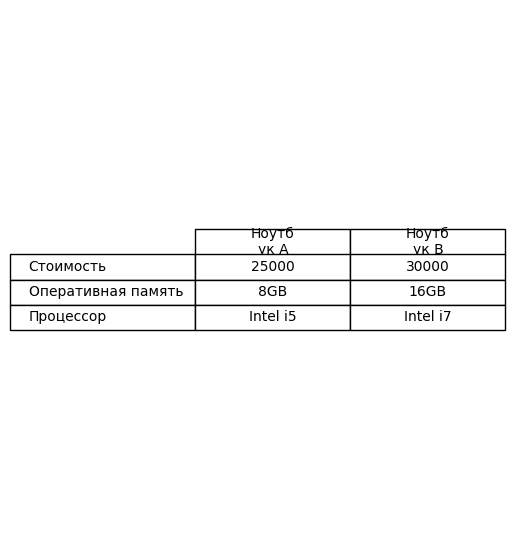

In [ ]:
import matplotlib.pyplot as plt
import textwrap

df = transposed_df

wrapped_columns = [
        "\n".join(textwrap.wrap(str(col), width=5))
        for col in df.columns
    ]

fig, ax = plt.subplots(figsize=(df.shape[1] * 2, df.shape[0] * 0.5 + 1))
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=df.values,
    colLabels=wrapped_columns,
    rowLabels=df.index.astype(str),
    loc='center',
    cellLoc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# buf = BytesIO()
# plt.savefig(buf, format='png', bbox_inches='tight', dpi=150)
plt.show()
# plt.close(fig)
# buf.seek(0)